# Maxwell–Boltzmann Speed Distributions
#### (equivalent to Ohring Fig 2.1)
We plot the Maxwell–Boltzmann speed distribution as giving in Ohring
$$\begin{align}
\tag{Ohring 2-1a}
f_{MB}(v;T)
&= \frac{1}{n}\frac{\mathrm{d}n}{\mathrm{d}v} \\
\tag{Ohring 2-1b}
f_{MB}(v;T)
&= \frac{4}{\sqrt{\pi}}
 \left(\frac{M}{2R_\text{g} T}\right)^{3/2}v^2
 \exp\left(-\frac{Mv^2}{2R_\text{g}T}\right)
\end{align}$$
so that $f(v)\,dv$ is the probability of finding a particle with speed in $[v,v+dv]$.



In [1]:
import numpy as np
from physkit.units import Temperature, Mass
from physkit.units.systems import UnitsSI, UnitsCGS
from physkit.constants import ConstantsSI, ConstantsCGS


CONSTANTS_MAP = {
  UnitsSI: ConstantsSI,
  UnitsCGS: ConstantsCGS
}

from typing import Union, Type
class MaxwellBoltzmannVelocityDistribution:
  @staticmethod
  def pdf(
      v: Union[float, np.ndarray],
      T: float,
      M: float,
      system: Type = UnitsSI
  ) -> Union[float, np.ndarray]:
    """
    Calculates the Maxwell-Boltzmann probability density function.
        
    Parameters:
    -----------
    v: float or np.ndarray
      speed (SI: m/s, CGS: cm/s)
    T   : float
      Absolute temperature (K)
    M   : float
      Molar mass (SI: kg/mol, CGS: g/mol)
    R_g : Type
      The physkit Unit System class (e.g., UnitsSI, UnitsCGS)
    """

    R_g = CONSTANTS_MAP[system].R_g

    prefactor = (4 / np.sqrt(np.pi)) * (M / (2 * R_g * T))**1.5
    exponent = np.exp(-(M * v**2) / (2 * R_g * T))
        
    return prefactor * (v**2) * exponent

# Example usage for Nitrogen (M = 0.028 kg/mol) at 300K
v_values = np.linspace(0, 1500, 100)
probabilities = MaxwellBoltzmannVelocityDistribution.pdf(v_values, T=300, M=0.028)


We will:
- plot **Al at $1200^\circ$C**
- plot **H$_2$ at $25^\circ$C and $1200^\circ$C**
- use $v$ in cm/s to match the classic figure scaling.


In [2]:
from physkit.elements import ELEMENTS

# Al at 1200 deg C
Al_temperature = [1200, Temperature.Units.C]
Al_molarmass = [ELEMENTS["Al"].mass, Mass.Units.g]
print(Al_temperature, Al_molarmass)

H2_temperature_1 = [25, Temperature.Units.C]
H2_molarmass = [ELEMENTS["H"].mass*2, Mass.Units.g]
H2_temperature_2 = [1200, Temperature.Units.C]



[1200, <Units.C: 1>] [26.981538, <Units.g: 1>]


Text(0, 0.5, 'f(v) ($\\mathrm{m^{-1}\\cdot s}$)')

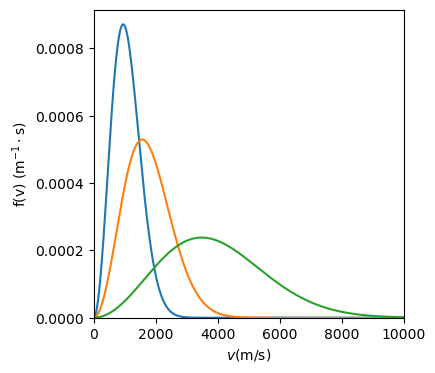

In [9]:
import matplotlib.pyplot as plt

v_arr = np.linspace(0,10000,1000)
Al_pdf = MaxwellBoltzmannVelocityDistribution.pdf(
  v=v_arr,
  T=Temperature.convert(from_= Al_temperature, to = Temperature.Units.K),
  M=Mass.convert(from_=Al_molarmass, to = Mass.Units.kg),
  system=UnitsSI
)

H2_pdf_1 = MaxwellBoltzmannVelocityDistribution.pdf(
  v=v_arr,
  T=Temperature.convert(from_= H2_temperature_1, to = Temperature.Units.K),
  M=Mass.convert(from_=H2_molarmass, to = Mass.Units.kg),
  system=UnitsSI
)

H2_pdf_2 = MaxwellBoltzmannVelocityDistribution.pdf(
  v=v_arr,
  T=Temperature.convert(from_= H2_temperature_2, to = Temperature.Units.K),
  M=Mass.convert(from_=H2_molarmass, to = Mass.Units.kg),
  system=UnitsSI
)


fig, ax = plt.subplots(1,1)
fig.set_size_inches(4,4)
ax.plot(v_arr, Al_pdf)
ax.plot(v_arr, H2_pdf_1)
ax.plot(v_arr, H2_pdf_2)
ax.set_xlim(left=v_arr.min(), right=v_arr.max())
ax.set_xlabel(r"$v(\mathrm{m/s}$)")
ax.set_ylim(bottom=v_arr.min())
ax.set_ylabel(r"f(v) ($\mathrm{m^{-1}\cdot s}$)")